# 3.4 Stacking and interpolating data

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#3.4-Stacking-and-interpolating-data" data-toc-modified-id="3.4-Stacking-and-interpolating-data-1">3.4 Stacking and interpolating data</a></span><ul class="toc-item"><li><span><a href="#3.4.1-Introduction" data-toc-modified-id="3.4.1-Introduction-1.1">3.4.1 Introduction</a></span><ul class="toc-item"><li><span><a href="#3.4.1.1-Test-your-login" data-toc-modified-id="3.4.1.1-Test-your-login-1.1.1">3.4.1.1 Test your login</a></span></li></ul></li><li><span><a href="#3.4.2-QA-data" data-toc-modified-id="3.4.2-QA-data-1.2">3.4.2 QA data</a></span><ul class="toc-item"><li><span><a href="#3.4.2.1-Why-QA-data?" data-toc-modified-id="3.4.2.1-Why-QA-data?-1.2.1">3.4.2.1 Why QA data?</a></span></li><li><span><a href="#3.4.2.2-Set-condition-variables" data-toc-modified-id="3.4.2.2-Set-condition-variables-1.2.2">3.4.2.2 Set condition variables</a></span></li><li><span><a href="#3.4.2.3-interpreting-QA" data-toc-modified-id="3.4.2.3-interpreting-QA-1.2.3">3.4.2.3 interpreting QA</a></span></li><li><span><a href="#3.4.2.4-Deriving-a-weight-from-QA" data-toc-modified-id="3.4.2.4-Deriving-a-weight-from-QA-1.2.4">3.4.2.4 Deriving a weight from QA</a></span></li></ul></li><li><span><a href="#3.4.3-A-time-series" data-toc-modified-id="3.4.3-A-time-series-1.3">3.4.3 A time series</a></span></li><li><span><a href="#3.4.4-Weighted-interpolation" data-toc-modified-id="3.4.4-Weighted-interpolation-1.4">3.4.4 Weighted interpolation</a></span><ul class="toc-item"><li><span><a href="#3.4.4.1-Smoothing" data-toc-modified-id="3.4.4.1-Smoothing-1.4.1">3.4.4.1 Smoothing</a></span></li></ul></li><li><span><a href="#3.4.5-Making-movies" data-toc-modified-id="3.4.5-Making-movies-1.5">3.4.5 Making movies</a></span><ul class="toc-item"><li><span><a href="#3.4.5.1-Javascript-HTML" data-toc-modified-id="3.4.5.1-Javascript-HTML-1.5.1">3.4.5.1 Javascript HTML</a></span></li><li><span><a href="#3.4.5.2-Animated-gif" data-toc-modified-id="3.4.5.2-Animated-gif-1.5.2">3.4.5.2 Animated gif</a></span></li></ul></li></ul></li></ul></div>

[[up to 3.0](Chapter3_1_GDAL.ipynb)]


## 3.4.1 Introduction

In this section, we will:

* develop code to produce a stacked dataset of spatio-temporal data on a grid
* interpolate over any missing data
* smooth the dataset

### 3.4.1.1 Test your login

Let's first test your NASA login:

In [1]:
import geog0111.nasa_requests as nasa_requests
from geog0111.cylog import cylog

url = 'https://e4ftl01.cr.usgs.gov/MOTA/MCD15A3H.006/2018.09.30/' 
        
# grab the HTML information
try:
    html = nasa_requests.get(url).text
    # test a few lines of the html
    if html[:20] == '<!DOCTYPE HTML PUBLI':
        print('this seems to be ok ... ')
        print('use cylog().login() anywhere you need to specify the tuple (username,password)')
except:
    print('login error ... ')
    print('try entering your username password again')
    print('then re-run this cell until it works')
    print('If its wednesday, ignore this!')
    # uncomment next line to reset password
    #cylog(init=True)

Enter your username: gomezdansj
········
this seems to be ok ... 
use cylog().login() anywhere you need to specify the tuple (username,password)


In [1]:
from geog0111.geog_data import *

destination_folder = Path('data')
if not destination_folder.exists():
        dest_path.mkdir()
        
procure_dataset()

# we have the filenames provided 
# in data/lai_filelist_2016.dat.txt
for year in [2016,2017]:
    control_file = f'data/lai_filelist_{year}.dat.txt'
    # read the ascii data from the file in
    filenames = open(control_file).read().split()

    # get the local files
    # set verbose=True if you want to see what is happening
    done = [procure_dataset(f,\
                verbose=True,\
                destination_folder=destination_folder) 
                                    for f in filenames]
    # done should be all True if this has worked

    # print the first 8 in the list, just to see it looks ok
    print(f'\n {year}\n','*'*len(str(year)))
    for f in filenames[:8]:
        print (f)


Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography 

trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg

Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography 

trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg

Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography 

Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography 

Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography 

Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography 

Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography 

Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography 

trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/

Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography computers
trying /data/selene/ucfajlg/geog011_data/
trying /archive/rsu_raid_0/plewis/public_html/geog0111_data
Running on UCL's Geography 

Now make sure you have the world borders ESRI shape file you need:

In [3]:
import requests
import shutil 
from pathlib import Path

# zip file
zipfile = 'TM_WORLD_BORDERS-0.3.zip'
# URL
tm_borders_url = f"http://thematicmapping.org/downloads/{zipfile}"
# destibnation folder
destination_folder = Path('data')

# set up some filenames
zip_file = destination_folder.joinpath(zipfile)
shape_file = zip_file.with_name(zipfile.replace('zip','shp'))

# download zip if need to
if not Path(zip_file).exists():
    r = requests.get(tm_borders_url)
    with open(zip_file, 'wb') as fp:
        fp.write (r.content)

# extract shp from zip if need to
if not Path(shape_file).exists():
    shutil.unpack_archive(zip_file.as_posix(),
                         extract_dir=destination_folder)

In [4]:
!ls data/*hdf

ls: cannot access data/*hdf: No such file or directory


## 3.4.2 QA data


### 3.4.2.1 Why QA data?

The quality of data varies according to sampling and other factors. For satellite-derived data using optical wavelengths, the two main controls are orbital constraints and cloud cover. We generally define a 'quaity' data layer to express this.

To use a satellite-derived dataset, we need to look at 'quality' data for dataset (and/or uncertainty).

For example, if interpolating data, we would want to base the weight we put on any sample on the 'quality' of that sample. This will be expressed by either some QC (Quality Control) assessment ('good', 'ok', 'bad') or some measure of uncertainty (or both).

Here, we will use the QA information in the LAI product to generate a sample weighting scheme. We shall later use this weighting for data smoothing and interpolation.

First, let's access the LAI and QA datasets.

We can do this by specifying either `Lai_500m` or `FparLai_QC` in the dataset label.

### 3.4.2.2 Set condition variables


Let's set up the variables we will use, including a pattern to match the `tile` information we need.

Here, we have:

    tile = 'h1[7-8]v0[3-4]'
    
which we can interpret as:

    h17v03, h17v04, h18v03, or h18v04
    
The tile definition ius useful for us to use in any output names (so we can identify it from the name). But the string `h1[7-8]v0[3-4]` contains some 'awkward' characters, namely `[`, `]` and `-` that we might prefer not to use in a filename.

So we derive a new descriptor that we call `tile_` which is more 'filename friendly'.

Thye rest of the code below proceeds much the same as code we have previously used.

We build a gdal VRT file from the set of hdf files using `gdal.BuildVRT()`.

Then we crop to the vector defined by the `FIPS` variable in the shapefile (the country code here) using `gdal.Warp()`. We save this as a gdal VRT file, decsribed by the variable `clipped_file`.

When we make gdal calls, we need to force the system to write files to disc. This can be done by closing the (effective) file descriptors, or by deleting the variable `g` in this case. If you don't do that, you can hit file synchronisation problems. You should always close (or delete) file descriptors when you have finished with them.

You should be able to follow what goes on in the code block below. We will re-use these same ideas later, so it is worthwhile understanding the steps we go through now.

In [4]:
import gdal
import numpy as np
from pathlib import Path
from geog0111.create_blank_file import create_blank_file
from datetime import datetime

#-----------------
# set up the dataset information
destination_folder = Path('data')
year = 2017
product = 'MCD15A3H'
version = 6
tile = 'h1[7-8]v0[3-4]'
doy = 149
params =  ['Lai_500m', 'FparLai_QC']
# Luxembourg
FIPS = "LU"
#-----------------

# make a text-friendly version of tile
tile_ = tile.replace('[','_').replace(']','_').replace('-','')+FIPS

# location of the shapefile
shape_file = destination_folder.\
                 joinpath('TM_WORLD_BORDERS-0.3.shp').as_posix()

# define strings for the ip and op files
ipfile = destination_folder.\
                joinpath(f'{product}.A{year}{doy:03d}.{tile_}.{version:03d}').as_posix()

opfile = ipfile.replace(f'{doy:03d}.','').replace(tile,tile_)

print('ipfile',ipfile)
print('opfile',opfile)

# now glob the hdf files matching the pattern
filenames = list(destination_folder\
                .glob(f'{product}.A{year}{doy:03d}.{tile}.{version:03d}.*.hdf'))

# start with an empty list
ofiles = []

# loop over each parameter we need
for d in params:
    
    # mangle the dataset names
    dataset_names = sorted([f'HDF4_EOS:EOS_GRID:'+\
                         f'"{file_name.as_posix()}":'+\
                         f'MOD_Grid_MCD15A3H:{d}'\
                            for file_name in filenames])

    # derive some filenames for vrt files
    spatial_file = f'{opfile}.{doy:03d}.{d}.vrt'
    clipped_file = f'{opfile}.{doy:03d}_clip.{d}.vrt'
    
    # build the files
    g = gdal.BuildVRT(spatial_file, dataset_names)
    if(g):
        del(g)
        g = gdal.Warp(clipped_file,\
                                   spatial_file,\
                                   format='VRT', dstNodata=255,\
                                   cutlineDSName=shape_file,\
                                   cutlineWhere=f"FIPS='{FIPS}'",\
                                   cropToCutline=True)
        if (g):
            del(g)
        ofiles.append(clipped_file)
print(ofiles)

ipfile data/MCD15A3H.A2017149.h1_78_v0_34_LU.006
opfile data/MCD15A3H.A2017h1_78_v0_34_LU.006
['data/MCD15A3H.A2017h1_78_v0_34_LU.006.149_clip.Lai_500m.vrt', 'data/MCD15A3H.A2017h1_78_v0_34_LU.006.149_clip.FparLai_QC.vrt']


**Exercise 3.4.1**

* examine the code block above, and write a function that takes as inputs the variables given in the block enclosed by `#-----------------`, the dataset information
* the code should setup the VRT files and return the list of clipped dataset filenames: `['data/MCD15A3H.A2017h1_78_v0_34_LU.006.149_clip.Lai_500m.vrt', 'data/MCD15A3H.A2017h1_78_v0_34_LU.006.149_clip.FparLai_QC.vrt']` here.
* Make sure you test your function: check that it generates the files you expect from the inputs you give.
* try to develop an automated test to see that it has worked (Homework)

**Hint**

Be clear about what you are doing in your code.

The purpose of this function is to build clipped VRT files for the conditions you set.

The conditions are the parameters driving the function.

The list of files you develop are returned. 

In [5]:
# do exercise here

### 3.4.2.3 interpreting QA

We now have some example files describing the LAI and QC datasets:

    data/MCD15A3H.A2017h1_78_v0_34_LU.006.149_clip.Lai_500m.vrt
    data/MCD15A3H.A2017h1_78_v0_34_LU.006.149_clip.FparLai_QC.vrt
    

The LAI dataset is decribed [on the NASA page](https://lpdaac.usgs.gov/dataset_discovery/modis/modis_products_table/mcd15a3h_v006), with the bit field information given in the [file spec](https://ladsweb.modaps.eosdis.nasa.gov/filespec/MODIS/6/MCD15A3H)

         BITFIELDS
       -------------
        0,0  MODLAND_QC bits
             '0' =  Good Quality (main algorithm with or without saturation)
             '1' =  Other Quality (back-up algorithm or fill values)

        1,1 SENSOR
             '0' = Terra
             '1' = Aqua

        2,2  DEADDETECTOR
             '0' = Detectors apparently fine for up to 50% of channels 1,2
             '1' = Dead detectors caused >50% adjacent detector retrieval

        3,4  CLOUDSTATE (this inherited from Aggregate_QC bits {0,1} cloud state)
             '00' = 0 Significant clouds NOT present (clear)
             '01' = 1 Significant clouds WERE present
             '10' = 2 Mixed cloud present on pixel
             '11' = 3 Cloud state not defined,assumed clear

        5,7  SCF_QC (3-bit, (range '000'..100') 5 level Confidence Quality score.
             '000' = 0, Main (RT) method used, best result possible (no saturation)
             '001' = 1, Main (RT) method used with saturation. Good,very usable
             '010' = 2, Main (RT) method failed due to bad geometry, empirical algorithm used
             '011' = 3, Main (RT) method failed due to problems other than geometry, 
                                  empirical algorithm used
             '100' = 4, Pixel not produced at all, value coudn't be retrieved 
                        (possible reasons: bad L1B data, unusable MOD09GA data)


In [6]:
import gdal
import numpy as np

filename = 'data/MCD15A3H.A2017h1_78_v0_34_LU.006.149_clip.FparLai_QC.vrt'
qa = gdal.Open(filename).ReadAsArray()
print(f'Unique QA values found in {filename}')
print(sorted(np.unique(qa)))

Unique QA values found in data/MCD15A3H.A2017h1_78_v0_34_LU.006.149_clip.FparLai_QC.vrt
[0, 2, 8, 10, 16, 18, 32, 34, 40, 42, 48, 50, 97, 99, 105, 107, 113, 115, 157, 255]



We will use the bitfield `SFC_QC` as our main way to interpret quality.

The information above tells us we need to extract bits 5-7 from the QA dataset.

Let's be clear what we mean by this.

The dataset `FparLai_QC` is of data type `uint8`, unsigned 8-bit integer (i.e. unsigned byte). 

so, for example, in the file above, we see the following 19 unique codes:

In [7]:
import pandas as pd
# some pretty printing code using pandas
qas = np.array([[format(q,'3d'),format(q,'08b')] \
                for q in sorted(np.unique(qa))]).T
pd.DataFrame({'decimal': qas[0], 'binary': qas[1]})

Recall the truth table for the `and` operation:

| A  | B  | A and B  | 
|:---:|:---:|:---:|
|  T |  T |  T | 
|  T |  F |  F | 
|  F |  T |  F | 
|  F |  F |  F | 

For binary rerpresentation, we replace `True` by `1` and `False` by `0`. 

We also use the bitwise `and` operator `&`:

| A  | B  | A & B  | 
|:---:|:---:|:---:|
|  1 |  1 |  1 | 
|  1 |  0 |  0 | 
|  0 |  1 |  0 | 
|  0 |  0 |  0 | 

Notice that `A & B` only lets the value of `B` come through if `A` is `1`. Setting `A` as `0` effectively 'switches off' the information in `B`.

We can see this more clearly using a combination of bits:

In [8]:
A = 0b01100
B = 0b11010

print('A         =',format(A,'#07b'))
print('B         =',format(B,'#07b'))
print('C = A & B =',format(A & B,'#07b'))

A         = 0b01100
B         = 0b11010
C = A & B = 0b01000


Here, the 'mask' `A` is set to `1` for bits 2 and 3 : `0b01100`.

So only the information in bits 2 and 3 of `B` is passed through to `C`. If we change the other bits in `B`, it has no effect on `C`:



In [9]:
A = 0b01100
B = 0b01001

print('A         =',format(A,'#07b'))
print('B         =',format(B,'#07b'))
print('C = A & B =',format(A & B,'#07b'))

A         = 0b01100
B         = 0b01001
C = A & B = 0b01000


**Exercise 3.4.2**

* copy the code from the block above
* change the bit values in `B` and check that only the information in the bits set as `1` in `A` is passed through to `C`
* make a new mask `A` and re-confirm your findings for this mask

**Hint**

We are using `A` as a mask, so we set the 'pass' bits in `A` to `1` and 'block' to `0`


In [10]:
# do exercise here

So, to extract bits 5-7 (the 3 left-most bits) from an 8-bit number, we first perform a bitwise (binary) 'and' operation with the mask `0b11100000`. This has `5` `0`s to the right.

Because we have trailing zeros (to the right) of the masked value, we perform a bit shift operation (`>>`) of length 5:

In [11]:
import pandas as pd
# some pretty printing code using pandas
mask = 0b11100000

qas = np.array([[format(q,'3d'),format(q,'08b'),\
                 format(q & mask,'08b'),
                 format((q & mask)>>5,'03b'),
                 format((q & mask)>>5,'3d')] \
                for q in sorted(np.unique(qa))]).T

pd.DataFrame({'decimal': qas[0], 'binary': qas[1],\
              'masked': qas[2],'shifted': qas[3],\
             'SFC_QC': qas[4]})

Looking back at the data interpretation table:

        5,7  SCF_QC (3-bit, (range '000'..100') 5 level Confidence Quality score.
             '000' = 0, Main (RT) method used, best result possible (no saturation)
             '001' = 1, Main (RT) method used with saturation. Good,very usable
             '010' = 2, Main (RT) method failed due to bad geometry, empirical algorithm used
             '011' = 3, Main (RT) method failed due to problems other than geometry, 
                                  empirical algorithm used
             '100' = 4, Pixel not produced at all, value coudn't be retrieved 
                        (possible reasons: bad L1B data, unusable MOD09GA data)


we can see that QA values of 0,2,,8,10,16 and 18 all correspond to `Main (RT) method used, best result possible (no saturation)`, values of 32,34, 40, 42,48, 50 to `Main (RT) method used with saturation. Good,very usable` etc.

We can apply this operation to the whole QA numpy array:

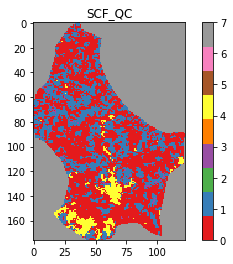

In [13]:
import gdal
import numpy as np
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline

filename = 'data/MCD15A3H.A2017h1_78_v0_34_LU.006.149_clip.FparLai_QC.vrt'
qa = gdal.Open(filename).ReadAsArray()
mask = 0b11100000


SCF_QC = (qa & mask)>>5

plt.title('SCF_QC')
plt.imshow(SCF_QC,cmap=matplotlib.cm.Set1)
plt.colorbar()

**Exercise 3.4.3**

* For the momnent, assume that we only want data which have `SCF_QC` set to `0` (i.e. `Main (RT) method used, best result possible (no saturation)`).
* read in the LAI data associated with this dataset, and set unwanted LAI data (i.e. those with `SCF_QC` not set to `0`) to Not a Number (`np.nan`)
* plot the resultant dataset

**Hint**

LAI data in `data/MCD15A3H.A2017h1_78_v0_34_LU.006.149_clip.Lai_500m.vrt`.

The LAI image plotted should show 'white' (no value) everywhere the `SCF_QC` image above is not red.

In [14]:
# do exercise here

### 3.4.2.4 Deriving a weight from QA

What we want to develop here is a translation from the QA information (given in `FparLai_QC`) to a *weight* that we can apply to the data. 

If the quality is poor, we want a low weight. If the quality is good, a high weight. It makes sense to call the highest weight 1.0.

For LAI, we can use the QA information contained in bits 5-7 of `FparLai_QC` to achieve this. 

The valid codes for `SCF_QC` here are:

    0 : Main (RT) method used best result possible (no saturation)
    1 : Main (RT) method used with saturation. Good very usable
    2 : Main (RT) method failed due to bad geometry empirical algorithm used
    3 : Main (RT) method failed due to problems other than geometry empirical algorithm used
    
    
where we have translated the binary representations above to decimal.

A useful way of this to some weight is to define a real number $n$, where $0 <= n < 1$ and raise this to the power of `SCF_QC`.

So, for example is we set `n = 0.61803398875` (the [inverse golden ratio](https://en.wikipedia.org/wiki/Golden_ratio)):

In [15]:
n = 0.61803398875

for SCF_QC in [0,1,2,3]:
    weight = n**SCF_QC
    print(f'SCF_QC: {SCF_QC} => weight {weight:.4f}')


SCF_QC: 0 => weight 1.0000
SCF_QC: 1 => weight 0.6180
SCF_QC: 2 => weight 0.3820
SCF_QC: 3 => weight 0.2361


Then we have the following meaning for the weights:


    1.0000 : Main (RT) method used best result possible (no saturation)
    0.6180 : Main (RT) method used with saturation. Good very usable
    0.3820 : Main (RT) method failed due to bad geometry empirical algorithm used
    0.2361 : Main (RT) method failed due to problems other than geometry empirical algorithm used
    
  
Altghough we could vary the value of $n$ used and get subtle variations, this sort of weighting should produce the desired result.


**Exercise 3.4.4**

* write a function that converts from `SCF_QC` value to weight. 
* apply this to the `SCF_QC` dataset we generated above.
* display the weight image, along side the `SCF_QC` and visually check you have the weighting correct

**Hint**

Since only `[0,1,2,3]` are valid inputs, you could use conditions such as:

    (SCF_QC == i) * (n ** i)

for valid values of `i`. This should then work correctly for arrays.

In [16]:
# do exercise here

You should end up with code that results in something like rthe following:

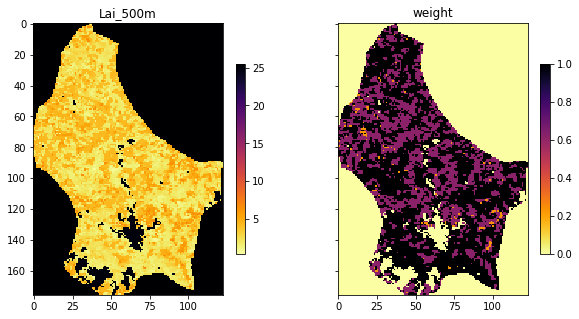

In [17]:
import matplotlib.pylab as plt

ofiles = ['data/MCD15A3H.A2017h1_78_v0_34_LU.006.149_clip.Lai_500m.vrt', \
          'data/MCD15A3H.A2017h1_78_v0_34_LU.006.149_clip.FparLai_QC.vrt']
params = ['Lai_500m', 'FparLai_QC']
lai = [gdal.Open(ofiles[i]).ReadAsArray() for i in range(len(params))]


lai[0] = lai[0] * 0.1
# if we want bit field 5-7
# we form a binary mask
mask57 = 0b11100000
# and right shift 5 (>> 5)
lai[1] = (lai[1] & mask57) >> 5
# 0 to 3 are good
scale = 0.61803398875
lai[1] = (scale**0) * (lai[1] == 0).astype(float) + \
         (scale**1) * (lai[1] == 1).astype(float) + \
         (scale**2) * (lai[1] == 2).astype(float) + \
         (scale**3) * (lai[1] == 3).astype(float)
    
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,
                       figsize=(10,5))
axs = np.array(axs).T.flatten()
params[1] = 'weight'

for i in range(len(params)):
    img = axs[i].imshow(lai[i], interpolation="nearest",
                 cmap=plt.cm.inferno_r)
    axs[i].set_title(params[i])
    plt.colorbar(img,ax=axs[i],shrink=0.7)

## 3.4.3 A time series

You should now know how to access and download datasets from the NASA servers and have developed functions to do this.

You should also know how to select a dataset from a set of hdf files, and mosaic, mask and crop the data to correspond to some vector boundary. This is a very common task in geospatial processing.

You should also know how to evaluate QA information and use this to determine some quality weight. This includes an understanding of how to interpret and use binary data fields ina QA dataset.

We now consider the case where we want to analyse a time series of data. We will use LAI over time to exemplify this.

We first develop a function to read and organise the data for a given date:

In [18]:
import gdal
import numpy as np
from pathlib import Path


def sort_data(FIPS,year,doy,tile,shape_file,
              param='Lai_500m',\
              version=6,\
              product='MCD15A3H',\
              destination_folder='data'):

    destination_folder = Path(destination_folder)

    tile_ = tile.replace('[','_').replace(']','_').replace('-','')+FIPS

    allopfile = destination_folder.\
                joinpath(f'{product}.A{year}.{tile_}.{version:03d}')

    ipfile = destination_folder.\
                    joinpath(f'{product}.A{year}{doy:03d}.{tile_}.{version:03d}').as_posix()

    opfile = ipfile.replace(f'{doy:03d}.','').replace(tile,tile_)

    filenames = destination_folder\
                    .glob(f'{product}.A{year}{doy:03d}.{tile}.{version:03d}.*.hdf')

    dataset_names = sorted([f'HDF4_EOS:EOS_GRID:'+\
                             f'"{file_name.as_posix()}":'+\
                             f'MOD_Grid_MCD15A3H:{param}'\
                                for file_name in filenames])
    spatial_file = f'{opfile}.{doy:03d}.{param}.vrt'
    clipped_file = f'{opfile}.{doy:03d}_clip.{param}.vrt'
    if len(dataset_names):
        g = gdal.BuildVRT(spatial_file, dataset_names)
        if(g):
            del(g)
            g = gdal.Warp(clipped_file,\
                               spatial_file,\
                               format='VRT', dstNodata=255,\
                               cutlineDSName=shape_file,\
                               cutlineWhere=f"FIPS='{FIPS}'",\
                               cropToCutline=True)
            if g:
                del g

        return clipped_file
    return None

Now we test this code, specifying the day, parameter etc.:

data/MCD15A3H.A2017h1_78_v0_34_LU.006.001_clip.Lai_500m.vrt


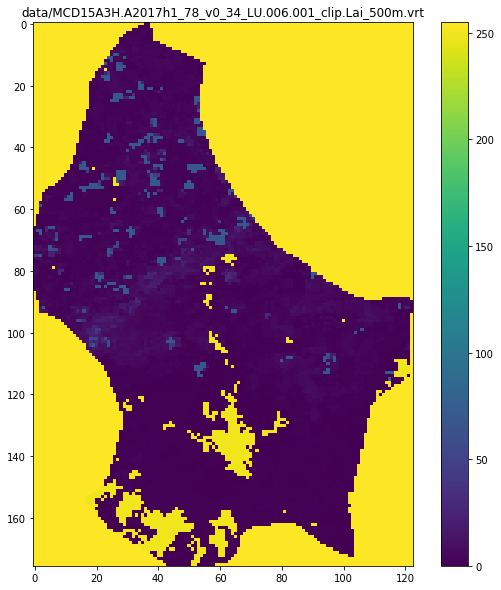

In [22]:
year = 2017
tile = 'h1[7-8]v0[3-4]'
doy = 1
FIPS = 'LU'
param = 'Lai_500m'

shape_file = Path('data').\
                 joinpath('TM_WORLD_BORDERS-0.3.shp').as_posix()

laifile = sort_data(FIPS,year,doy,tile,shape_file,
              param=param)
print(laifile)

data = gdal.Open(laifile).ReadAsArray()
plt.figure(figsize=(10,10))
plt.title(laifile)
plt.imshow(data)
plt.colorbar()

**Exercise 3.4.5**

* Test that the code above works for reading the QA dataset as well.
* Write a function that reads both the LAI dataset and the QA data, scales the LAI data appropriately and produces a weight from the QA data.
* Return the LAI data and the weight

**Hint** 

Scale LAI by multiplying by 0.1 as above.

In [23]:
# do exercise here

You should end up with something like:

In [24]:
import gdal
import numpy as np
from pathlib import Path

def get_lai_doy(FIPS,year,doy,tile,shape_file,
              version=6,\
              scale = 0.61803398875,\
              product='MCD15A3H',\
              destination_folder='data'):    
    
    params = ['Lai_500m','FparLai_QC']
    # get the parameters we want
    files = []
    for p in params:
        datafile = sort_data(FIPS,year,doy,tile,shape_file,
              param=param,version=version,\
              product=product,\
              destination_folder=destination_folder)
        # append to list
        files.append(datafile)
        
    # pull out of list
    laifile = files[0]
    qafile  = files[1]
    
    mask57 = 0b11100000
    
    if laifile:
        lai = gdal.Open(laifile).ReadAsArray() * 0.1
        qa  = gdal.Open(qafile).ReadAsArray()
        # get the right bits
        qa = (qa & mask57) >> 5
        # weight
        weight = (scale**0) * (qa == 0).astype(float) + \
                 (scale**1) * (qa == 1).astype(float) + \
                 (scale**2) * (qa == 2).astype(float) + \
                 (scale**3) * (qa == 3).astype(float)       
    
        return lai,weight
    return None,None



Try it out:

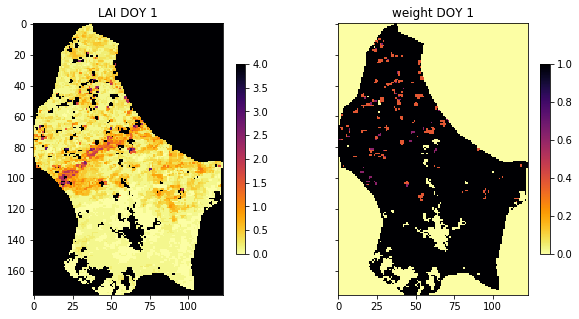

In [25]:
import gdal
import numpy as np
from pathlib import Path
import matplotlib.pylab as plt
%matplotlib inline
# try this out

year = 2017
tile = 'h1[7-8]v0[3-4]'
doy = 1
FIPS = 'LU'

shape_file = Path('data').\
                 joinpath('TM_WORLD_BORDERS-0.3.shp').as_posix()

# test it

lai,weight = get_lai_doy(FIPS,year,doy,tile,shape_file)

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,
                       figsize=(10,5))
axs = np.array(axs).T.flatten()

img = axs[0].imshow(lai, interpolation="nearest", vmin=0, vmax=4,
                 cmap=plt.cm.inferno_r)
axs[0].set_title(f'LAI DOY {doy}')
plt.colorbar(img,ax=axs[0],shrink=0.7)
img = axs[1].imshow(weight, interpolation="nearest", vmin=0, vmax=1,
                 cmap=plt.cm.inferno_r)
axs[1].set_title(f'weight DOY {doy}')
plt.colorbar(img,ax=axs[1],shrink=0.7)

**Exercise 3.4.6**

* Now we have some code to get the LAI and weight for one day, write a function that generates an annual dataset of LAI and weight
* show the dataset shapes
* Show the code works by plotting datasets for the beggining, middle and end of year

**Hint**

The result should be a set of two 3D numpy arrays

Really, all you need do is loop over each day, and add the new dataszet to a list. 

Remember to create an initial empty list before you loop over day.

Think what might happen if the data for some day is missing.

In [31]:
# do exercise here

Another way of doing all of this would be to create a gdal VRT file of the temporal datasets:

In [26]:
import gdal
import numpy as np
from pathlib import Path
from datetime import datetime

year = 2017
tile = 'h1[7-8]v0[3-4]'
FIPS = 'LU'
param='Lai_500m'
# time step
dt = 4

shape_file = Path('data').\
                 joinpath('TM_WORLD_BORDERS-0.3.shp').as_posix()

ndoys = (datetime(year,12,31)-datetime(year,1,1)).days

def get_filename(FIPS,year,doy,tile,
              version=6,\
              product='MCD15A3H',\
              destination_folder='data'):
    '''
    A utility to get a useful output filename
    '''
    destination_folder = Path(destination_folder)
    tile_ = tile.replace('[','_').replace(']','_').replace('-','')+FIPS
    allopfile = destination_folder.\
                joinpath(f'{product}.A{year}.{tile_}.{version:03d}')
    return(allopfile)


# loop over parameters
for param in ['Lai_500m','FparLai_QC']:
    
    allopfile = get_filename(FIPS,year,doy,tile)

    # loop over doy
    allvrt = []
    for doy in range(1,ndoys+1,dt):
        laifile = sort_data(FIPS,year,doy,tile,shape_file,
                  param=param)

        if (laifile):
            allvrt.append(laifile)

    g = gdal.BuildVRT(f'{allopfile.as_posix()}.{param}.vrt', \
                      allvrt,separate=True)
    if (g):
        del g
        print (f'{allopfile.as_posix()}.{param}.vrt')

data/MCD15A3H.A2017.h1_78_v0_34_LU.006.Lai_500m.vrt
data/MCD15A3H.A2017.h1_78_v0_34_LU.006.FparLai_QC.vrt


Now let's read the data in:

In [27]:
import gdal
import numpy as np

destination_folder = Path('data')
year = 2017
product = 'MCD15A3H'
version = 6
tile = 'h1[7-8]v0[3-4]'
params =  ['Lai_500m', 'FparLai_QC']
FIPS = 'LU'
dt = 4

allopfile = get_filename(FIPS,year,doy,tile)

datasets = []
for d in params:
    
    g = gdal.Open(f'{allopfile.as_posix()}.{d}.vrt',gdal.GA_ReadOnly)
    data = np.array([g.GetRasterBand(b+1).ReadAsArray() \
                for b in range(g.RasterCount)])

    datasets.append(data)

    # interpret data
datasets[0] = datasets[0] * 0.1
# if we want bit field 5-7
# we form a binary mask
mask57 = 0b11100000
# and right shift 5 (>> 5)
datasets[1] = (datasets[1] & mask57) >> 5
# 0 to 3 are good
scale = 0.61803398875
datasets[1] = (scale**0) * (datasets[1] == 0).astype(float) + \
              (scale**1) * (datasets[1] == 1).astype(float) + \
              (scale**2) * (datasets[1] == 2).astype(float) + \
              (scale**3) * (datasets[1] == 3).astype(float)

weight = datasets[1]
lai = datasets[0]

print(lai.shape)

(91, 176, 123)


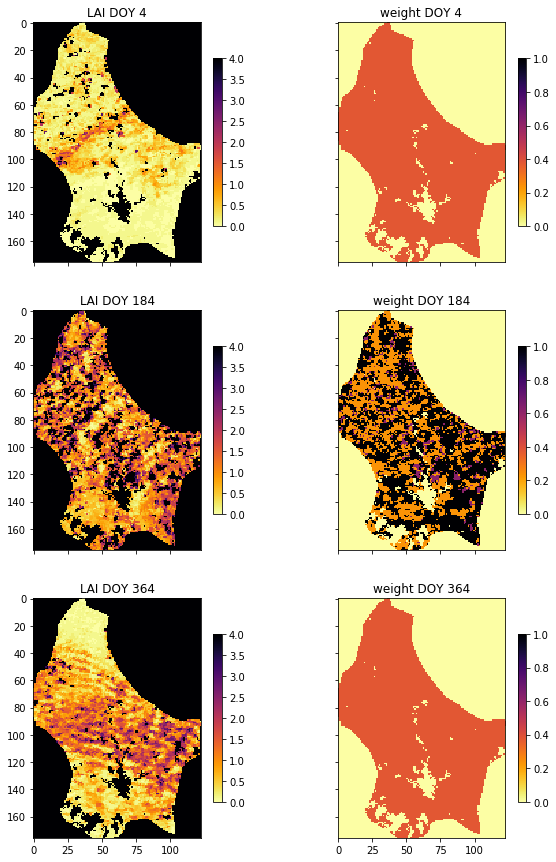

In [28]:
# DISPLAY SOME

nsamp = lai.shape[0]
fig, axs = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True,
                       figsize=(10,15))
axs = np.array(axs).T.flatten()


for i,n in enumerate(range(0,nsamp+1,int(nsamp/2))):
    doy = (n+1)*dt
    img = axs[i].imshow(lai[n], interpolation="nearest", vmin=0, vmax=4,
                     cmap=plt.cm.inferno_r)
    axs[i].set_title(f'LAI DOY {doy}')
    plt.colorbar(img,ax=axs[i],shrink=0.7)
    img = axs[3+i].imshow(weight[n], interpolation="nearest", vmin=0, vmax=1,
                     cmap=plt.cm.inferno_r)
    axs[3+i].set_title(f'weight DOY {doy}')
    plt.colorbar(img,ax=axs[3+i],shrink=0.7)

## 3.4.4 Weighted interpolation

### 3.4.4.1 Smoothing

Some animations to help understand how we can use convolution to perform a weighted interpolation are [given](html/Chapter3_4a_GDAL_stacking_and_interpolating-convolution.html). You should got through these if you have not previously come across convolution filtering.

In convolution, we combine a *signal* $y$ with a *filter* $f$ to achieve a filtered signal. For example, if we have an noisy signal, we will attempt to reduce the influence of high frequency information in the signal (a 'low pass' filter, as we let the low frequency information *pass*).

We can perform a weighted interpolation by:

* numerator   = smooth( signal $\times$ weight)
* denominator = smooth( weight)
* result = numerator/denominator

In [30]:
sigma = 8
import scipy
import scipy.ndimage.filters

x = np.arange(-3*sigma,3*sigma+1)
gaussian = np.exp((-(x/sigma)**2)/2.0)

numerator = scipy.ndimage.filters.convolve1d(lai * weight, gaussian, axis=0,mode='wrap')
denominator = scipy.ndimage.filters.convolve1d(weight, gaussian, axis=0,mode='wrap')

# avoid divide by 0 problems by setting zero values
# of the denominator to not a number (NaN)
denominator[denominator==0] = np.nan

interpolated_lai = numerator/denominator

(0, 6)

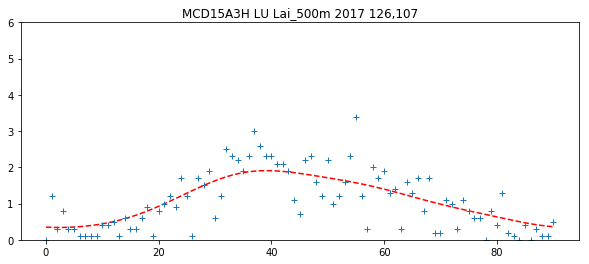

In [31]:
## find where the weight is highest, and lets look there!
sweight = weight.sum(axis=0)
r,c = np.where(sweight == np.max(sweight))
plt.figure(figsize=(10,4))
plt.title(f'{product} {FIPS} {params[0]} {year} {r[0]},{c[0]}')
plt.plot((interpolated_lai)[:,r[0],c[0]],'r--')
plt.plot((lai)[:,r[0],c[0]],'+')
plt.ylim(0,6)

**Exercise 3.4.7**

* select some pixels (row, col) from the lai dataset and plot the original LAI, the interpolated LAI, and the weight

In [32]:
# do exercise here

## 3.4.5 Making movies

It is often useful to animate time series information. There are several ways of doing this.

Bear in mind that the larger the datasets, number of images and/or frames, the more time it is likely to take to generate the animations. You probably don't want more than around 100 frames to make an animation of this sort.

The two approaches we will use are:

* Javascript HTML in the notebook using `anim.to_jshtml()` from `matplotlib.animation`
* Animated gif using the `imageio` library

### 3.4.5.1 Javascript HTML

This approach uses javascript in html within the notebook to genrate an animation and player. The player is useful, in that we can easily stop at and explore individual frames.

The HTML representation is written to a temporary directory (internally to [anim.to_jshtml()](https://matplotlib.org/_modules/matplotlib/animation.html#Animation.to_jshtml)) but deleted on exit.

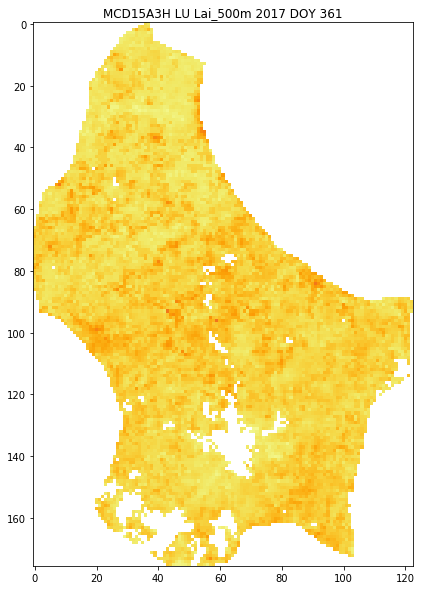

In [33]:
from matplotlib import animation
import matplotlib.pylab as plt
from IPython.display import HTML

'''
lai movie javascript/html (jshtml)
'''

#fig, ax = plt.subplots(figsize=(10,10))
fig = plt.figure(0,figsize=(10,10))

# define an animate function
# with the argument i, the frame number
def animate(i):
    # show frame i of the ilai dataset
    plt.figure(0)
    im = plt.imshow(interpolated_lai[i],vmin=0,vmax=6,cmap=plt.cm.inferno_r)
    plt.title(f'{product} {FIPS} {params[0]} {year} DOY {dt*i+1:03d}')
    # make sure to return a tuple!!
    return (im,)

# set up the animation  
anim = animation.FuncAnimation(fig, animate, 
                               frames=interpolated_lai.shape[0], interval=40, 
                               blit=True)     

# display animation as HTML
HTML(anim.to_jshtml())

### 3.4.5.2 Animated gif

In the second approach, we save individual frames of an animation, and read them in, using `imageio.imread()` into a list. We choose to write the individual frames here to a temporary directory (so they are cleaned up on exit).

This list of `imageio` datasets is then fed to [`imageio.mimsave()`](https://imageio.readthedocs.io/en/stable/userapi.html) to save the sequence as an animated gif. This can then be displayed in a notebook cell (or otherwise). Note that the file [data/MCD15A3H.A2017.h1_78_v0_34_LU.006.gif](data/MCD15A3H.A2017.h1_78_v0_34_LU.006.gif) is saved in this case.

In [55]:
import imageio
import tempfile
from pathlib import Path

'''
lai movie as animated gif
'''

# switch interactive plotting off
# as we just want to save trhe frames, 
# not plot them now
plt.ioff()

allopfile = get_filename(FIPS,year,doy,tile,\
                         destination_folder='images')

images = []
with tempfile.TemporaryDirectory() as tmpdirname:
    ofile = f'{tmpdirname}/tmp.png'
    
    for i in range(interpolated_lai.shape[0]):
        plt.figure(0,figsize=(10,10))
        # don' display the interim frames
        plt.ioff()
        plt.clf()
        plt.imshow(interpolated_lai[i],vmin=0,vmax=6,cmap=plt.cm.inferno_r)
        plt.title(f'{product} {FIPS} {params[0]} {year} DOY {dt*i+1:03d}')
        plt.colorbar(shrink=0.85)
        plt.savefig(ofile)    
        images.append(imageio.imread(ofile))
plt.clf()
imageio.mimsave(f'{allopfile}.gif', images)
print(f'{allopfile}.gif')
# switch interactive plotting back on
plt.ion()

images/MCD15A3H.A2017.h1_78_v0_34_LU.006.gif


<Figure size 720x720 with 0 Axes>

![](images/MCD15A3H.A2017.h1_78_v0_34_LU.006.gif)

**Exercise 3.4.8**

* Write a set of functions, with clear commenting and document strings tha:
    * develops the LAI and QA dataset for a given year to produce LAI data and weight
    * produces interpolated / smoothed LAI data as a numpy 3D array for the year
    * saves the resultant numpy dataset in a `npz` file
* Once y
    
**Hint**

Put all of the material above together.

Remember `np.savez()`!

In [ ]:
# do exercise here